### **공공조달 데이터분석**

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# 데이터프레임 불러오기
data = pd.read_csv('/content/drive/MyDrive/Contest/공공조달/dataset/150_data_2.csv', index_col = 0)
data.head(10)

,녹색제품실적(건수),온실가스 배출량,용수사용량(ton),에너지사용량(TOE),폐기물발생량(ton),녹색제품 구매액(백만),에너지이용합리화법관련제품(건수),온실가스 감축률,여성임원수,장애인생산품구매비중,중소기업제품사용(건수),장애인채용현황(명),환경 유관부서 수,기부실적(백만원),총 직원수,여성직원수,감사임원수,여성직원비율,실적(백만명)
공공기관,,,,,,,,,,,,,,,,,,,
가축위생방역지원본부,19.0,2074.0,932.00,80.20,4.95,18.0,9.0,3.27,2.0,0.0,16.0,0.0,1.0,46.65,1275.0,436.43,1.0,0.34,10391.88
건강보험심사평가원,89.0,8987.0,65829.00,4107.57,186.40,3200.0,14.0,36.38,4.0,0.0,40.0,0.0,3.0,595.59,3971.0,2823.75,1.0,0.71,76878.46
건설근로자공제회,96.0,54.0,1226.25,64.85,13.88,70.0,38.0,15.63,4.0,0.0,46.0,0.0,2.0,21.18,218.5,83.50,1.0,0.38,1547.88
게임물관리위원회,11.0,11.0,NaN,NaN,NaN,62.0,8.0,56.00,3.0,11.0,9.0,0.0,NaN,1.77,99.0,30.00,1.0,0.30,4321.18
경제인문사회연구회,34.0,18.0,NaN,NaN,NaN,67.0,21.0,50.00,3.0,0.0,22.0,0.0,NaN,0.00,98.0,39.00,16.0,0.40,3825.08
고용노동부,438.0,12397.0,26289.00,971.10,123.40,1625.0,259.0,10.34,5.0,2.0,209.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,196782.57
공무원연금공단,145.0,938.0,7513.00,322.26,29.51,375.0,69.0,30.52,2.0,0.0,75.0,1.0,5.0,37.27,683.0,323.56,1.0,0.47,65349.03
과학기술정책연구원,4.0,3.0,2054.00,195.21,2.51,0.0,NaN,76.92,2.0,0.0,NaN,0.0,1.0,0.00,167.0,79.00,1.0,0.47,992.77
관세청,690.0,9825.0,5285.22,257.36,26.74,3219.0,86.0,19.43,0.0,0.0,509.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,92803.41


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 가축위생방역지원본부 to 환경부
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   녹색제품실적(건수)         146 non-null    float64
 1   온실가스 배출량           136 non-null    float64
 2   용수사용량(ton)         139 non-null    float64
 3   에너지사용량(TOE)        139 non-null    float64
 4   폐기물발생량(ton)        139 non-null    float64
 5   녹색제품 구매액(백만)       141 non-null    float64
 6   에너지이용합리화법관련제품(건수)  142 non-null    float64
 7   온실가스 감축률           136 non-null    float64
 8   여성임원수              149 non-null    float64
 9   장애인생산품구매비중         148 non-null    float64
 10  중소기업제품사용(건수)       139 non-null    float64
 11  장애인채용현황(명)         149 non-null    float64
 12  환경 유관부서 수          139 non-null    float64
 13  기부실적(백만원)          115 non-null    float64
 14  총 직원수              133 non-null    float64
 15  여성직원수              133 non-null    float64
 16  감사임원수              133

In [108]:
# 결측치 확인
data.isna().sum()

녹색제품실적(건수)            3
온실가스 배출량             13
용수사용량(ton)           10
에너지사용량(TOE)          10
폐기물발생량(ton)          10
녹색제품 구매액(백만)          8
에너지이용합리화법관련제품(건수)     7
온실가스 감축률             13
여성임원수                 0
장애인생산품구매비중            1
중소기업제품사용(건수)         10
장애인채용현황(명)            0
환경 유관부서 수            10
기부실적(백만원)            34
총 직원수                16
여성직원수                16
감사임원수                16
여성직원비율               16
실적(백만명)               7
dtype: int64

In [109]:
# 결측치 평균으로 채우기
data.fillna(data.mean(),inplace=True)

In [110]:
# 결측치 확인
data.isna().sum()

녹색제품실적(건수)           0
온실가스 배출량             0
용수사용량(ton)           0
에너지사용량(TOE)          0
폐기물발생량(ton)          0
녹색제품 구매액(백만)         0
에너지이용합리화법관련제품(건수)    0
온실가스 감축률             0
여성임원수                0
장애인생산품구매비중           0
중소기업제품사용(건수)         0
장애인채용현황(명)           0
환경 유관부서 수            0
기부실적(백만원)            0
총 직원수                0
여성직원수                0
감사임원수                0
여성직원비율               0
실적(백만명)              0
dtype: int64

In [113]:
data.columns = ['Green_CNT','Gas','Water','Energy','Waste','Green_AMT','Energy_pr','Gas_reduce','Female_exe',
                'Disabled_pr','Small_CNT','Disabled_CNT','Env','Donation','Member','Female_member','Auditor','Female_RTO','Target' ]

In [114]:
# 상관관계 분석(전체 데이터)
corr_data = data.corr()
corr_data

,Green_CNT,Gas,Water,Energy,Waste,Green_AMT,Energy_pr,Gas_reduce,Female_exe,Disabled_pr,Small_CNT,Disabled_CNT,Env,Donation,Member,Female_member,Auditor,Female_RTO,Target
Green_CNT,1.000000,0.077570,0.025012,-0.014534,-0.016397,0.432004,0.977495,-0.047314,0.018537,-0.045018,0.913260,0.092498,-0.004935,0.048329,0.141704,0.099601,-0.024978,-0.018619,0.387258
Gas,0.077570,1.000000,0.107678,0.001151,0.004272,0.042439,0.062267,-0.127104,0.044844,-0.070420,0.090818,0.023458,0.107207,0.039170,0.118503,0.155966,0.018412,0.017765,0.084634
Water,0.025012,0.107678,1.000000,0.725886,0.721825,0.062473,0.011510,0.007633,-0.130935,-0.060067,-0.019241,0.080920,0.067232,0.017662,0.068389,0.027315,-0.008402,-0.127894,0.112766
Energy,-0.014534,0.001151,0.725886,1.000000,0.998241,-0.015565,-0.012788,0.000243,-0.121838,-0.032137,-0.021032,-0.029392,-0.057183,-0.029377,0.001944,-0.003540,0.005462,-0.044850,-0.009745
Waste,-0.016397,0.004272,0.721825,0.998241,1.000000,-0.018855,-0.013723,0.010434,-0.113348,-0.031700,-0.021600,-0.034036,-0.064404,-0.029720,-0.004595,-0.009987,0.001372,-0.047097,-0.014352
Green_AMT,0.432004,0.042439,0.062473,-0.015565,-0.018855,1.000000,0.349177,-0.012539,0.027341,-0.065391,0.389256,0.084489,0.202645,0.401433,0.298171,0.237330,-0.083603,-0.047586,0.751474
Energy_pr,0.977495,0.062267,0.011510,-0.012788,-0.013723,0.349177,1.000000,-0.041436,0.033077,-0.029952,0.919255,-0.000003,-0.038390,0.022908,0.042722,0.031628,-0.007403,0.007886,0.281290
Gas_reduce,-0.047314,-0.127104,0.007633,0.000243,0.010434,-0.012539,-0.041436,1.000000,0.139530,0.162499,-0.046835,0.033789,0.027474,0.033719,-0.034804,-0.019319,0.056898,0.163066,-0.017306
Female_exe,0.018537,0.044844,-0.130935,-0.121838,-0.113348,0.027341,0.033077,0.139530,1.000000,0.075198,0.065252,0.026978,0.092679,0.012431,-0.062761,-0.035828,0.070730,0.232440,0.006810
Disabled_pr,-0.045018,-0.070420,-0.060067,-0.032137,-0.031700,-0.065391,-0.029952,0.162499,0.075198,1.000000,-0.053287,-0.075433,-0.074676,0.024750,-0.064734,-0.027334,-0.071322,0.102578,-0.086820


<function matplotlib.pyplot.show>

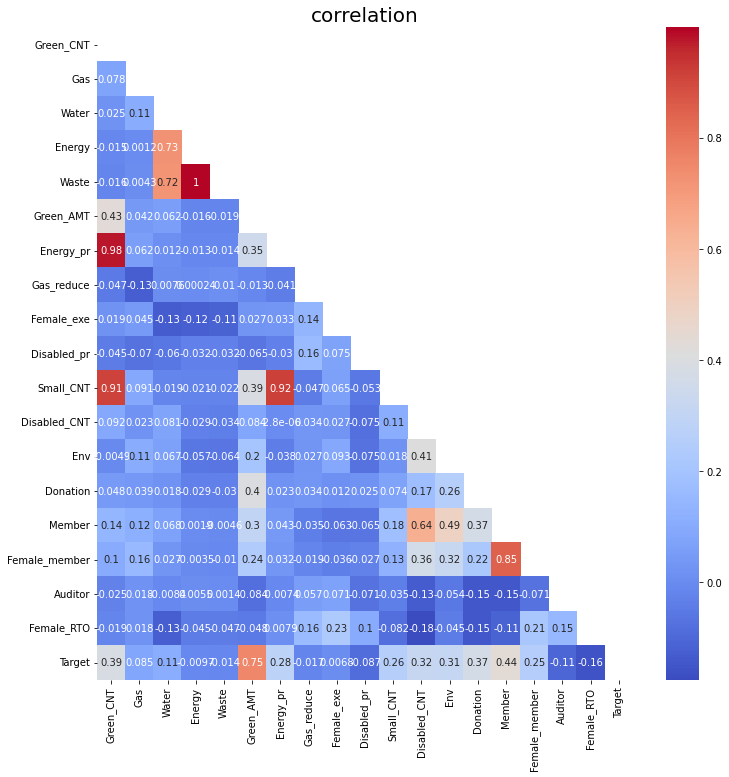

In [115]:
# 시각화
mask = np.zeros_like(corr_data) # 숫자 표시
mask[np.triu_indices_from(mask)] = True # 상삼각만
plt.figure(figsize=(12,12))
sns.heatmap(corr_data, annot=True, mask=mask, cmap='coolwarm')
plt.title('correlation', fontsize=20)
plt.show

In [119]:
# 상관관계 분석(분류)
env_column = ['Green_CNT','Gas','Water','Energy','Waste','Green_AMT','Energy_pr','Gas_reduce', 'Target']
hm_column = ['Female_exe','Disabled_pr','Small_CNT','Disabled_CNT','Env','Donation','Member','Female_member','Auditor','Female_RTO', 'Target']

env_corr = data[env_column].corr()
hm_corr = data[hm_column].corr()

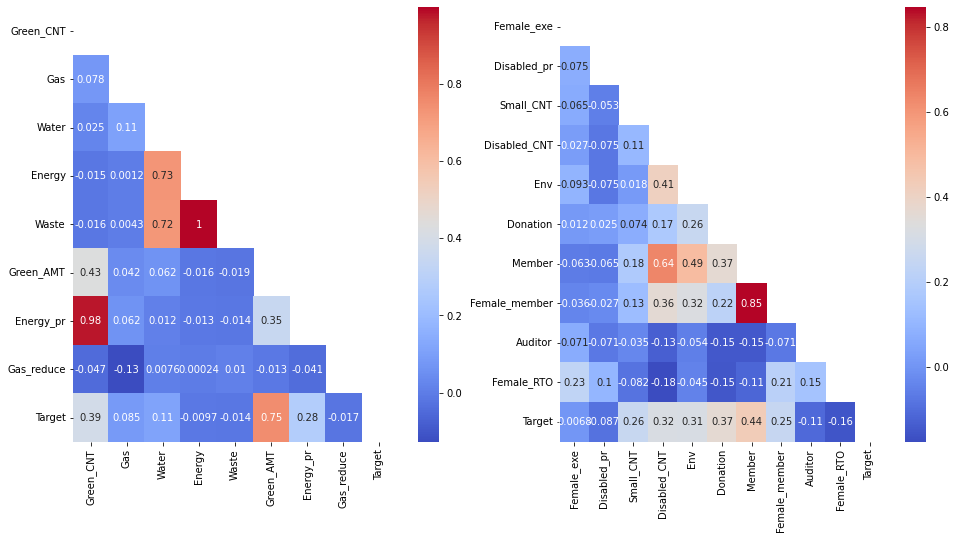

In [129]:
# 시각화
mask1 = np.zeros_like(env_corr)
mask2 = np.zeros_like(hm_corr)
mask1[np.triu_indices_from(mask1)] = True
mask2[np.triu_indices_from(mask2)] = True
fig, axs = plt.subplots(figsize=(16,8), nrows=1,ncols=2, squeeze=False)
sns.heatmap(env_corr, annot=True,mask=mask1, cmap='coolwarm', ax=axs[0][0])
sns.heatmap(hm_corr, annot=True, mask=mask2, cmap='coolwarm', ax=axs[0][1])
